##  BIG DATA PROJECT 

In [1]:
import pymongo 

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

In [2]:
myclient

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [68]:
mydb = myclient["Sreenu"]

In [5]:
mycol=mydb['diabetes']

In [7]:
import pandas as pd
documents = mycol.find({})

df =  pd.DataFrame(list(documents))
df.head()

,_id,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,662d80403e7e03aae09b9e8e,False,True,True,True,40,True,False,False,False,...,True,False,5,18,15,True,False,9,4,3
1,662d80403e7e03aae09b9e8f,False,False,False,False,25,True,False,False,True,...,False,True,3,0,0,False,False,7,6,1
2,662d80403e7e03aae09b9e90,False,True,True,True,28,False,False,False,False,...,True,True,5,30,30,True,False,9,4,8
3,662d80403e7e03aae09b9e91,False,True,False,True,27,False,False,False,True,...,True,False,2,0,0,False,False,11,3,6
4,662d80403e7e03aae09b9e92,False,True,True,True,24,False,False,False,True,...,True,False,2,3,0,False,False,11,5,4


In [14]:
## https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   _id                   100000 non-null  object
 1   Diabetes_binary       100000 non-null  bool  
 2   HighBP                100000 non-null  bool  
 3   HighChol              100000 non-null  bool  
 4   CholCheck             100000 non-null  bool  
 5   BMI                   100000 non-null  int64 
 6   Smoker                100000 non-null  bool  
 7   Stroke                100000 non-null  bool  
 8   HeartDiseaseorAttack  100000 non-null  bool  
 9   PhysActivity          100000 non-null  bool  
 10  Fruits                100000 non-null  bool  
 11  Veggies               100000 non-null  bool  
 12  HvyAlcoholConsump     100000 non-null  bool  
 13  AnyHealthcare         100000 non-null  bool  
 14  NoDocbcCost           100000 non-null  bool  
 15  GenHlth           

### Our Dataset has 100000 rows and 23 columns   with no missing values 

## Model Building

##### import required libraries 

<AxesSubplot:>

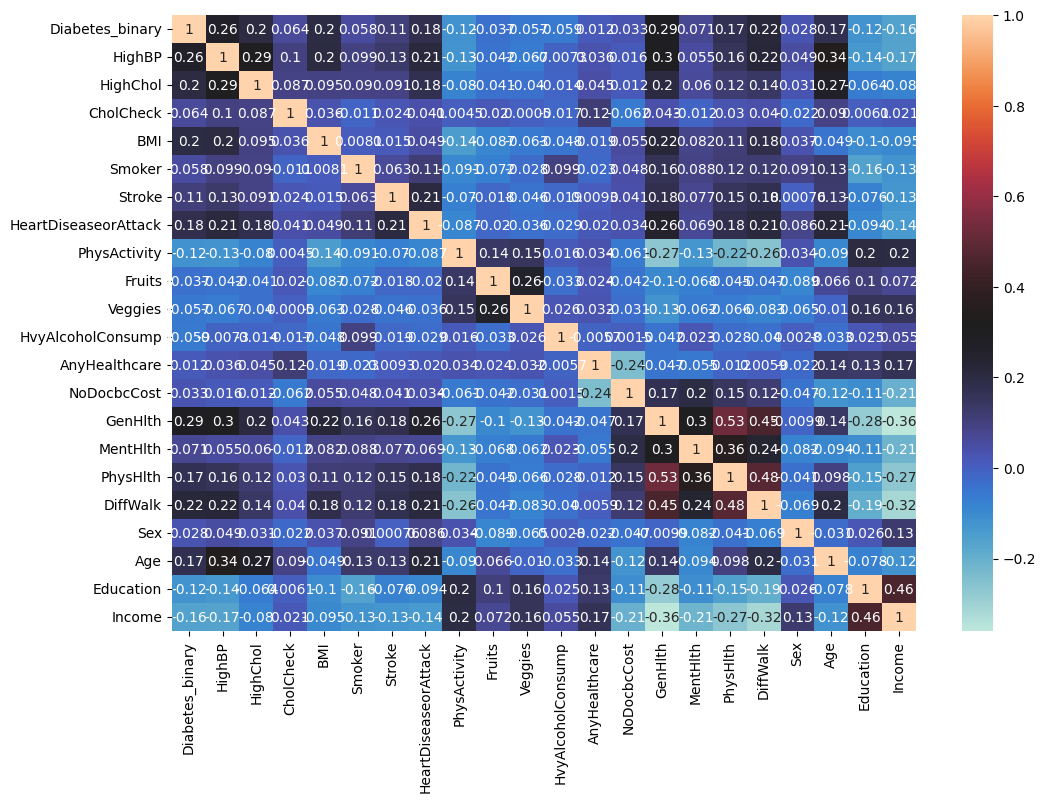

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='icefire', ax=ax)

#### by the corelation plot we see diabetes is related to to highBp,highCOl,BMI,GenHealth,Age mpre than other indicators

#### Id,income,Education,Nodocbccost does not affect the model hence we can remove the columns in our analysis 

In [12]:
columns_to_remove = ['_id', 'Income', 'Education', 'NoDocbcCost']

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_remove)

In [13]:
df.describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,28.462350,2.503730,3.160320,4.23378,8.091540
std,7.201615,1.069775,7.338159,8.67894,3.042951
min,12.000000,1.000000,0.000000,0.00000,1.000000
25%,24.000000,2.000000,0.000000,0.00000,6.000000
50%,27.000000,2.000000,0.000000,0.00000,8.000000
75%,31.000000,3.000000,2.000000,3.00000,10.000000
max,98.000000,5.000000,30.000000,30.00000,13.000000


In [15]:
## train-test split

In [16]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline


In [64]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [19]:
### KNeighborsClassifier¶


In [25]:
knn = KNeighborsClassifier(n_neighbors=5)


In [26]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.88      0.96      0.92     17194
        True       0.40      0.18      0.25      2806

    accuracy                           0.85     20000
   macro avg       0.64      0.57      0.58     20000
weighted avg       0.81      0.85      0.82     20000



<AxesSubplot:>

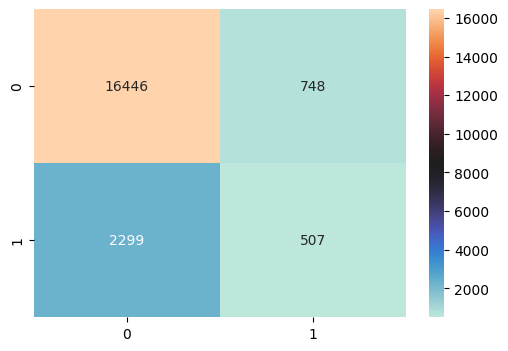

In [29]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), ax=ax, annot=True, cmap='icefire',fmt='d')

In [66]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.88      0.96      0.92     17194
        True       0.46      0.19      0.27      2806

    accuracy                           0.85     20000
   macro avg       0.67      0.58      0.60     20000
weighted avg       0.82      0.85      0.83     20000



In [67]:
feature_importance = rf.feature_importances_

Text(0.5, 1.0, 'Feature Importance')

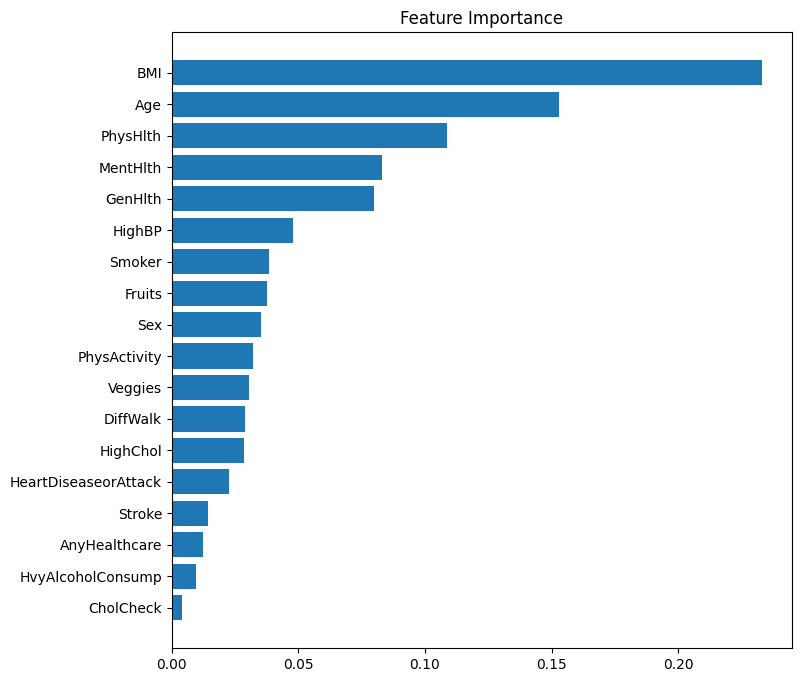

In [50]:
sorted_idx = feature_importance.argsort()
fig = plt.figure(figsize=(8, 8))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.title('Feature Importance')

In [58]:
X = df.drop(['Diabetes_binary', 'CholCheck', 'HvyAlcoholConsump','AnyHealthcare','Stroke','DiffWalk'], axis=1)
y = df['Diabetes_binary']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [61]:
model = RandomForestClassifier(100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.88      0.96      0.92     17194
        True       0.44      0.20      0.28      2806

    accuracy                           0.85     20000
   macro avg       0.66      0.58      0.60     20000
weighted avg       0.82      0.85      0.83     20000



<AxesSubplot:>

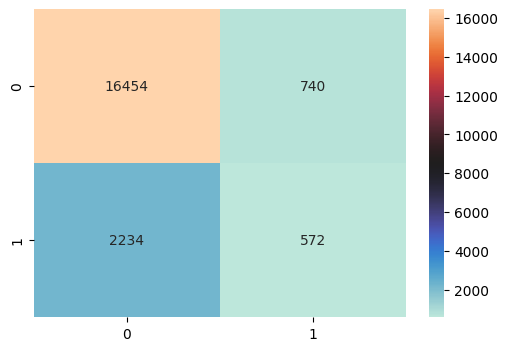

In [63]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, ax=ax, cmap='icefire',fmt='d')

In [71]:
from sklearn.linear_model import LogisticRegression

model2=LogisticRegression()
model2.fit(X_train, y_train)
preds=model2.predict(X_test)
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

       False       0.87      0.98      0.93     17194
        True       0.56      0.14      0.22      2806

    accuracy                           0.86     20000
   macro avg       0.72      0.56      0.57     20000
weighted avg       0.83      0.86      0.83     20000



<AxesSubplot:>

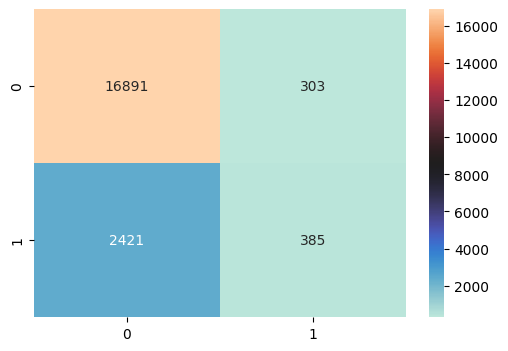

In [72]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,preds), annot=True, ax=ax, cmap='icefire',fmt='d')

# Logistic Regression Performs well 